In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [392]:
bike_df = pd.read_csv(r'C:\Users\Samya\Downloads\day.csv')

In [393]:
print(bike_df.head(10))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   
5        6  06-01-2018       1   0     1        0        4           1   
6        7  07-01-2018       1   0     1        0        5           1   
7        8  08-01-2018       1   0     1        0        6           0   
8        9  09-01-2018       1   0     1        0        0           0   
9       10  10-01-2018       1   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.

In [394]:
bike_df.isnull().sum() # no null values are present

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [395]:
# dropping casual and registed as the cnt is the target variable
bike_df.drop(['casual', 'registered'], inplace=True, axis = 1)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [396]:
dup_row = bike_df.duplicated(['instant'])
print(dup_row.value_counts()) # no duplicate rows

False    730
dtype: int64


In [397]:
bike_df.set_index('instant', inplace=True)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [398]:
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [399]:
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df['yr'] = bike_df['yr'].map({0:'2018', 1:'2019'})
bike_df['mnth'] = bike_df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_df['weekday'] = bike_df['weekday'].map({0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear-Partlycloudy', 2:'Mist-Cloudy', 3:'LightSnow-lightRain-Thunderstorm', 4:'HeavyRain-IcePallets-Thunderstorm'})

bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,spring,2018,Jan,0,Saturday,0,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,spring,2018,Jan,0,Sunday,0,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,spring,2018,Jan,0,Monday,1,Clear-Partlycloudy,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,spring,2018,Jan,0,Tuesday,1,Clear-Partlycloudy,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,spring,2018,Jan,0,Wednesday,1,Clear-Partlycloudy,9.305237,11.46350,43.6957,12.522300,1600


In [400]:
bike_df.shape

(730, 13)

In [401]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    object 
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 79.8+ KB


In [402]:
# converting categorical variables to string and dteday to datetime format
bike_df[['season', 'yr', 'weekday', 'weathersit']] = bike_df[['season', 'yr', 'weekday', 'weathersit']].astype(str)
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'], yearfirst = True)

In [403]:
bike_df.info()
bike_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 79.8+ KB


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,spring,2018,Jan,0,Saturday,0,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,spring,2018,Jan,0,Sunday,0,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,spring,2018,Jan,0,Monday,1,Clear-Partlycloudy,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,spring,2018,Jan,0,Tuesday,1,Clear-Partlycloudy,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,spring,2018,Jan,0,Wednesday,1,Clear-Partlycloudy,9.305237,11.46350,43.6957,12.522300,1600


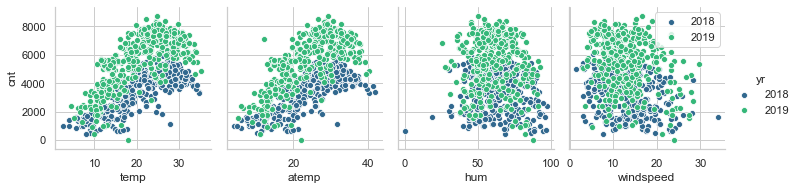

In [404]:
# checking the linear relationship with cnt
x =sns.pairplot(bike_df, palette='viridis', x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , hue='yr' )
plt.legend(labels=['2018', '2019'])
plt.show()
# So there is a linear reationship for temp and atemp with cnt

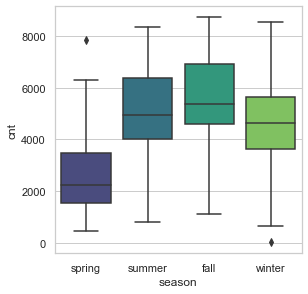

In [405]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_df, palette='viridis')

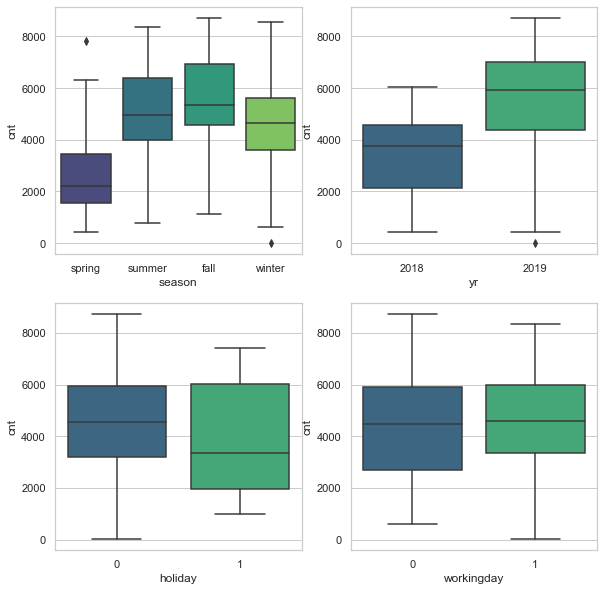

In [406]:
# Checking the distribution of rentals across different categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_df, palette='viridis')
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=bike_df, palette='viridis')
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike_df, palette='viridis')
plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='cnt', data=bike_df, palette='viridis')

plt.show()

# In summer and fall, count is high
# In 2019, count is high

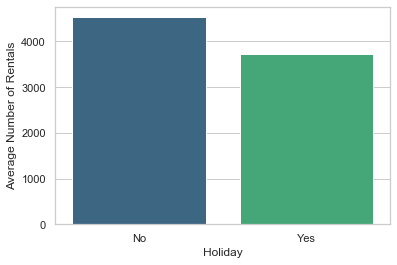

In [407]:
# Checking business on Holidays
bike_holiday_df = bike_df.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=bike_holiday_df, palette='viridis')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Rentals')
plt.show()

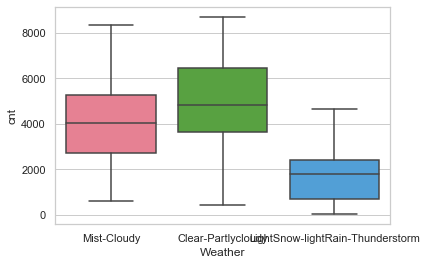

In [408]:
sns.boxplot(x='weathersit', y='cnt', data=bike_df, palette='husl')
plt.xlabel('Weather')
plt.show()
# count is high on days with good weather

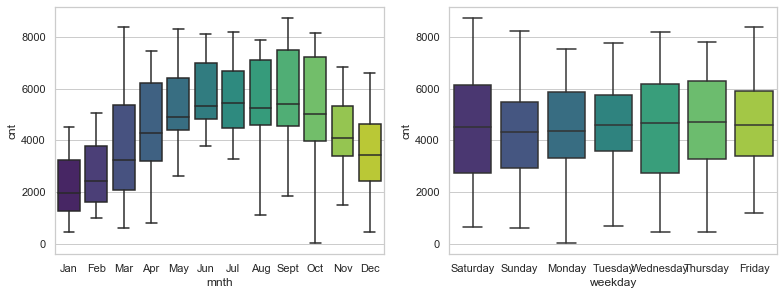

In [409]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,4)
sns.boxplot(x='mnth', y='cnt', data=bike_df, palette='viridis')

plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike_df, palette='viridis')

plt.show()

#except Sunday, the count is very close to 6000

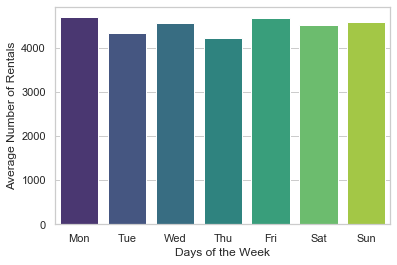

In [410]:
# Total rentals on different days of the week.
weekday_df = bike_df.groupby(['weekday'])['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', data=weekday_df, palette='viridis')
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Days of the Week')
plt.ylabel('Average Number of Rentals')
plt.show()

In [411]:
# Creating dummy variables
dummy = pd.get_dummies(bike_df[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow-lightRain-Thunderstorm,weathersit_Mist-Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [412]:
bike_df = pd.concat([bike_df,dummy], axis=1)   #Axis=1 is for horizontal stacking
bike_df = bike_df.drop(['season','mnth','weekday','weathersit'], axis=1)

# dropping dteday as we got month and year separately
bike_df.drop('dteday', inplace=True, axis = 1)

bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow-lightRain-Thunderstorm,weathersit_Mist-Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
1,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
3,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
5,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [413]:
bike_df.shape

(730, 30)

In [414]:
# moving cnt to the end
col = bike_df.pop("cnt")
bike_df['cnt'] = col

In [415]:
# Splitting the data into train and test

df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=100)

print('Shape of the Train data is:' , df_train.shape)
print('Shape of the Test data is:' , df_test.shape)

Shape of the Train data is: (510, 30)
Shape of the Test data is: (220, 30)


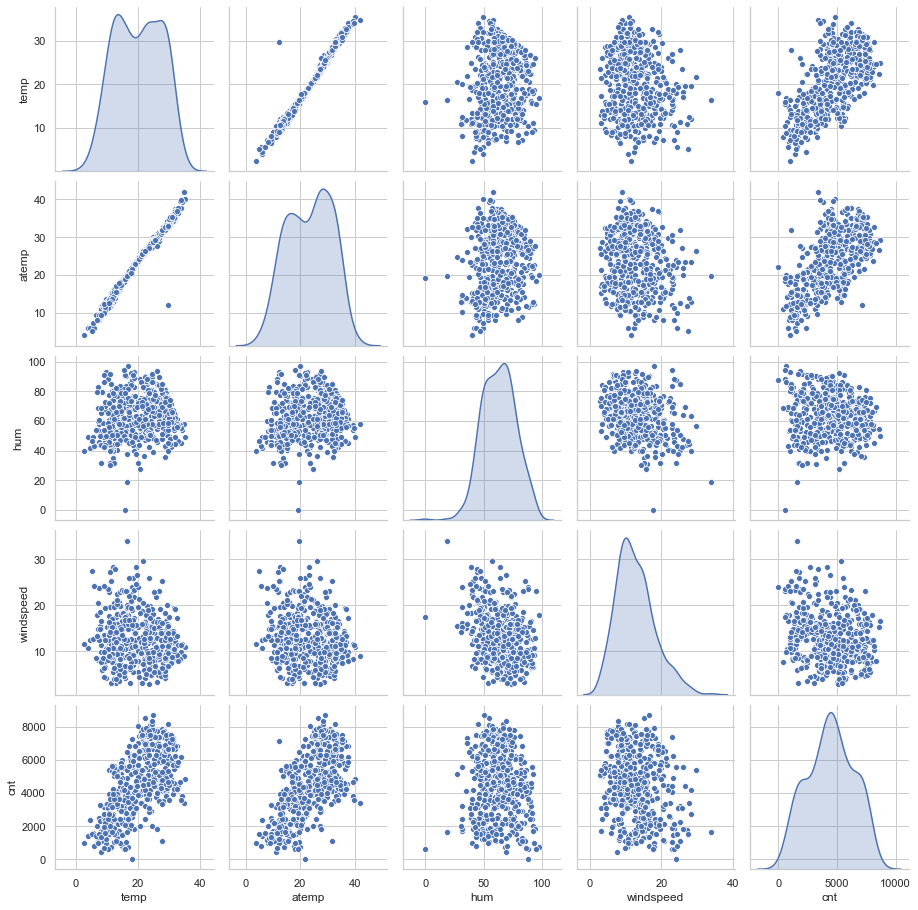

In [416]:
sns.pairplot(df_train[[ 'temp','atemp', 'hum', 'windspeed','cnt']], diag_kind='kde')
plt.show()

In [417]:
# Feature engineering starts

scaler = MinMaxScaler()
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

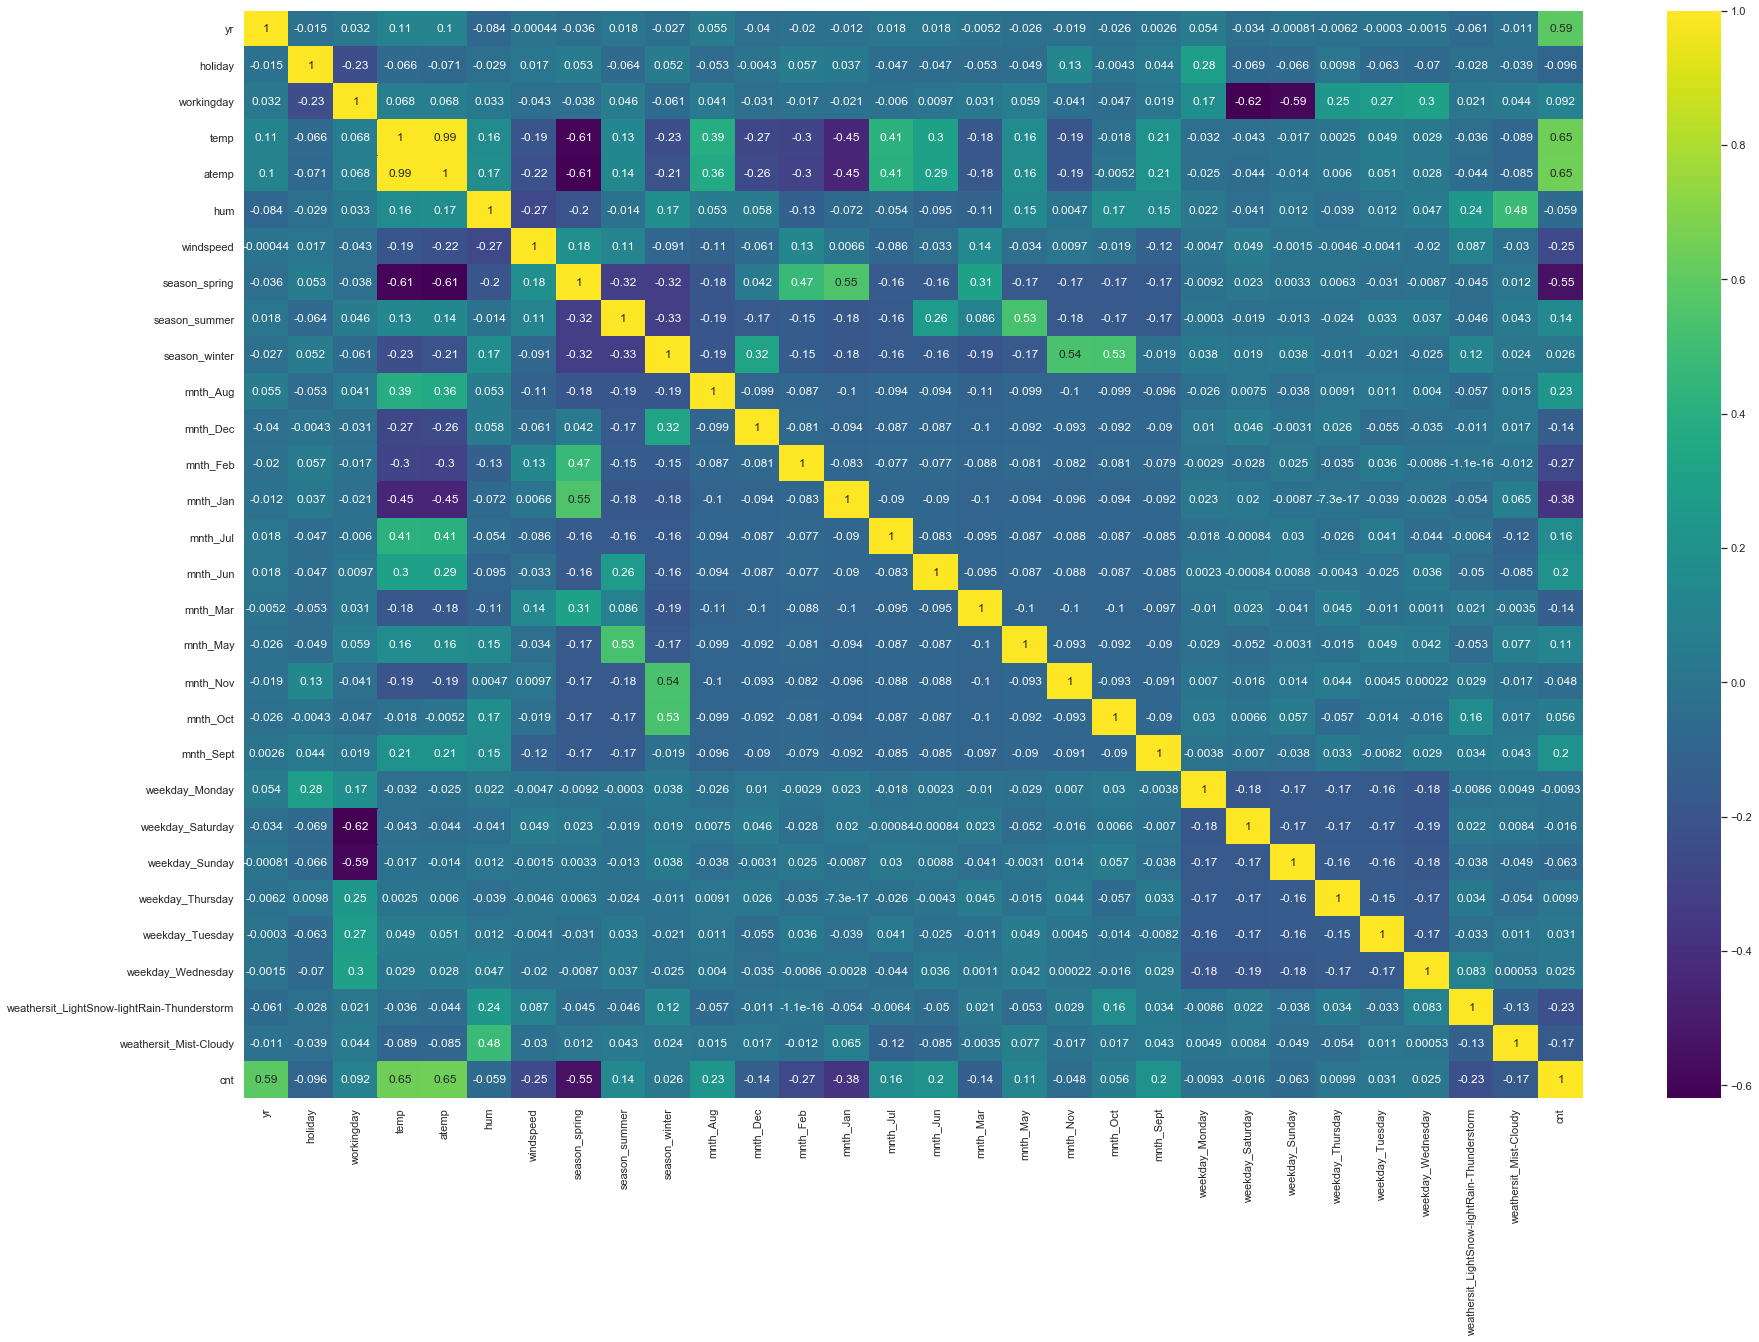

In [418]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True, cmap='viridis')
plt.show()

#cnt has strong colinearity with yr, temp, atemp and temp and atemp have nearly perfect colinearity, 
# so either of these will be considered for model building

In [419]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.81e-180
Time:                        21:16:18   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2433      0.035      6.887      0.000       0.174       0.313
yr                                              0.2325      0.008     28.794      0.000       0.217       0.248
holiday                                         0.0109      0.024      0.451      0.652      -0.037       0.058
workingday                                      0.0963      0.012      7.835      0.000       0.072       0.120
temp                                            0.3880      0.142      2.727      0.007       0.108       0.668
atemp                                           0.0590      0.138      0.426      0.670      -0.213       0.331
hum                                            -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                                      -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring                                  -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer                                   0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter                                   0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug                                        0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                                       -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                                       -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                                       -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_Jul                                       -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_Jun                                        0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_Mar                                        0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                                        0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov                                       -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct                                        0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sept                                       0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Monday                                 -0.0216      0.015     -1.401      0.162      -0.052       0.009
weekday_Saturday                                0.0952      0.014      6.910      0.000       0.068       0.122
weekday_Sunday                                  0.0410     

In [420]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
22,weekday_Saturday,19.71
23,weekday_Sunday,18.34
7,season_spring,10.77
9,season_winter,9.46
8,season_summer,8.29
18,mnth_Nov,6.79
10,mnth_Aug,6.47


In [421]:
X = X_train.drop('mnth_Mar',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.75e-181
Time:                        21:16:18   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2441      0.033      7.380      0.000       0.179       0.309
yr                                              0.2325      0.008     28.824      0.000       0.217       0.248
holiday                                         0.0111      0.024      0.462      0.645      -0.036       0.058
workingday                                      0.0965      0.012      8.151      0.000       0.073       0.120
temp                                            0.3877      0.142      2.729      0.007       0.109       0.667
atemp                                           0.0588      0.138      0.425      0.671      -0.213       0.330
hum                                            -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed                                      -0.1837      0.026     -6.983      0.000      -0.235      -0.132
season_spring                                  -0.0447      0.028     -1.575      0.116      -0.101       0.011
season_summer                                   0.0421      0.026      1.637      0.102      -0.008       0.093
season_winter                                   0.1074      0.027      3.910      0.000       0.053       0.161
mnth_Aug                                        0.0216      0.032      0.676      0.499      -0.041       0.084
mnth_Dec                                       -0.0456      0.026     -1.755      0.080      -0.097       0.005
mnth_Feb                                       -0.0338      0.022     -1.517      0.130      -0.078       0.010
mnth_Jan                                       -0.0646      0.022     -2.892      0.004      -0.109      -0.021
mnth_Jul                                       -0.0333      0.033     -0.999      0.318      -0.099       0.032
mnth_Jun                                        0.0055      0.024      0.233      0.816      -0.041       0.052
mnth_May                                        0.0251      0.020      1.268      0.205      -0.014       0.064
mnth_Nov                                       -0.0410      0.031     -1.333      0.183      -0.102       0.019
mnth_Oct                                        0.0065      0.031      0.213      0.831      -0.054       0.067
mnth_Sept                                       0.0859      0.029      2.961      0.003       0.029       0.143
weekday_Monday                                 -0.0216      0.015     -1.402      0.162      -0.052       0.009
weekday_Saturday                                0.0954      0.013      7.159      0.000       0.069       0.122
weekday_Sunday                                  0.0411      0.014      3.011      0.003       0.014       0.068
weekday_Thursday                               -0.0097     

In [422]:
X = X.drop('weekday_Wednesday',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.83e-182
Time:                        21:16:19   Log-Likelihood:                 527.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2433      0.033      7.376      0.000       0.179       0.308
yr                                              0.2325      0.008     28.847      0.000       0.217       0.248
holiday                                         0.0095      0.024      0.401      0.689      -0.037       0.056
workingday                                      0.0946      0.011      8.752      0.000       0.073       0.116
temp                                            0.3909      0.142      2.758      0.006       0.112       0.669
atemp                                           0.0554      0.138      0.402      0.688      -0.215       0.326
hum                                            -0.1525      0.038     -3.973      0.000      -0.228      -0.077
windspeed                                      -0.1838      0.026     -6.994      0.000      -0.235      -0.132
season_spring                                  -0.0450      0.028     -1.585      0.114      -0.101       0.011
season_summer                                   0.0419      0.026      1.631      0.103      -0.009       0.092
season_winter                                   0.1073      0.027      3.910      0.000       0.053       0.161
mnth_Aug                                        0.0214      0.032      0.672      0.502      -0.041       0.084
mnth_Dec                                       -0.0455      0.026     -1.752      0.080      -0.097       0.006
mnth_Feb                                       -0.0338      0.022     -1.515      0.130      -0.078       0.010
mnth_Jan                                       -0.0647      0.022     -2.896      0.004      -0.109      -0.021
mnth_Jul                                       -0.0333      0.033     -0.998      0.319      -0.099       0.032
mnth_Jun                                        0.0052      0.024      0.221      0.825      -0.041       0.052
mnth_May                                        0.0250      0.020      1.265      0.206      -0.014       0.064
mnth_Nov                                       -0.0413      0.031     -1.343      0.180      -0.102       0.019
mnth_Oct                                        0.0066      0.031      0.215      0.830      -0.054       0.067
mnth_Sept                                       0.0857      0.029      2.956      0.003       0.029       0.143
weekday_Monday                                 -0.0184      0.013     -1.412      0.159      -0.044       0.007
weekday_Saturday                                0.0968      0.013      7.532      0.000       0.072       0.122
weekday_Sunday                                  0.0425      0.013      3.225      0.001       0.017       0.068
weekday_Thursday                               -0.0064     

In [423]:
X = X_train.drop('mnth_Nov',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.96e-181
Time:                        21:16:19   Log-Likelihood:                 526.49
No. Observations:                 510   AIC:                            -997.0
Df Residuals:                     482   BIC:                            -878.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2264      0.032      7.129      0.000       0.164       0.289
yr                                              0.2327      0.008     28.810      0.000       0.217       0.249
holiday                                         0.0042      0.023      0.181      0.856      -0.042       0.050
workingday                                      0.0930      0.012      7.804      0.000       0.070       0.116
temp                                            0.3972      0.142      2.796      0.005       0.118       0.676
atemp                                           0.0596      0.138      0.431      0.667      -0.212       0.332
hum                                            -0.1570      0.038     -4.093      0.000      -0.232      -0.082
windspeed                                      -0.1839      0.026     -6.974      0.000      -0.236      -0.132
season_spring                                  -0.0446      0.030     -1.487      0.138      -0.104       0.014
season_summer                                   0.0549      0.024      2.326      0.020       0.009       0.101
season_winter                                   0.0926      0.025      3.753      0.000       0.044       0.141
mnth_Aug                                        0.0380      0.031      1.240      0.216      -0.022       0.098
mnth_Dec                                       -0.0140      0.019     -0.732      0.465      -0.051       0.024
mnth_Feb                                       -0.0125      0.028     -0.453      0.651      -0.067       0.042
mnth_Jan                                       -0.0424      0.028     -1.525      0.128      -0.097       0.012
mnth_Jul                                       -0.0177      0.032     -0.547      0.584      -0.081       0.046
mnth_Jun                                        0.0138      0.024      0.576      0.565      -0.033       0.061
mnth_Mar                                        0.0159      0.021      0.762      0.446      -0.025       0.057
mnth_May                                        0.0305      0.021      1.475      0.141      -0.010       0.071
mnth_Oct                                        0.0409      0.019      2.125      0.034       0.003       0.079
mnth_Sept                                       0.1071      0.026      4.116      0.000       0.056       0.158
weekday_Monday                                 -0.0213      0.015     -1.383      0.167      -0.052       0.009
weekday_Saturday                                0.0916      0.013      6.845      0.000       0.065       0.118
weekday_Sunday                                  0.0375      0.014      2.753      0.006       0.011       0.064
weekday_Thursday                               -0.0106     

In [424]:
X = X.drop('mnth_Dec',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model4 = lr.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.18e-182
Time:                        21:16:20   Log-Likelihood:                 526.21
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     483   BIC:                            -884.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2219      0.031      7.124      0.000       0.161       0.283
yr                                              0.2326      0.008     28.816      0.000       0.217       0.248
holiday                                         0.0040      0.023      0.171      0.864      -0.042       0.050
workingday                                      0.0914      0.012      7.804      0.000       0.068       0.114
temp                                            0.4049      0.142      2.860      0.004       0.127       0.683
atemp                                           0.0591      0.138      0.427      0.670      -0.213       0.331
hum                                            -0.1605      0.038     -4.220      0.000      -0.235      -0.086
windspeed                                      -0.1825      0.026     -6.942      0.000      -0.234      -0.131
season_spring                                  -0.0487      0.029     -1.650      0.100      -0.107       0.009
season_summer                                   0.0566      0.023      2.410      0.016       0.010       0.103
season_winter                                   0.0919      0.025      3.729      0.000       0.043       0.140
mnth_Aug                                        0.0399      0.031      1.307      0.192      -0.020       0.100
mnth_Feb                                       -0.0035      0.025     -0.143      0.887      -0.052       0.045
mnth_Jan                                       -0.0326      0.024     -1.338      0.181      -0.080       0.015
mnth_Jul                                       -0.0163      0.032     -0.508      0.612      -0.080       0.047
mnth_Jun                                        0.0146      0.024      0.609      0.543      -0.032       0.062
mnth_Mar                                        0.0221      0.019      1.162      0.246      -0.015       0.059
mnth_May                                        0.0318      0.021      1.544      0.123      -0.009       0.072
mnth_Oct                                        0.0455      0.018      2.500      0.013       0.010       0.081
mnth_Sept                                       0.1100      0.026      4.279      0.000       0.060       0.161
weekday_Monday                                 -0.0213      0.015     -1.379      0.168      -0.052       0.009
weekday_Saturday                                0.0900      0.013      6.819      0.000       0.064       0.116
weekday_Sunday                                  0.0365      0.014      2.692      0.007       0.010       0.063
weekday_Thursday                               -0.0105      0.016     -0.670      0.503      -0.041       0.020
weekday_Tuesday                                -0.0180     

In [425]:
X = X.drop('mnth_Mar',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.13e-182
Time:                        21:16:21   Log-Likelihood:                 525.50
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     484   BIC:                            -888.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2249      0.031      7.241      0.000       0.164       0.286
yr                                              0.2326      0.008     28.803      0.000       0.217       0.248
holiday                                         0.0031      0.023      0.131      0.896      -0.043       0.049
workingday                                      0.0927      0.012      7.957      0.000       0.070       0.116
temp                                            0.4111      0.142      2.904      0.004       0.133       0.689
atemp                                           0.0536      0.138      0.387      0.699      -0.218       0.325
hum                                            -0.1619      0.038     -4.258      0.000      -0.237      -0.087
windspeed                                      -0.1838      0.026     -6.997      0.000      -0.235      -0.132
season_spring                                  -0.0365      0.028     -1.324      0.186      -0.091       0.018
season_summer                                   0.0593      0.023      2.541      0.011       0.013       0.105
season_winter                                   0.0887      0.024      3.620      0.000       0.041       0.137
mnth_Aug                                        0.0357      0.030      1.176      0.240      -0.024       0.095
mnth_Feb                                       -0.0191      0.021     -0.922      0.357      -0.060       0.022
mnth_Jan                                       -0.0482      0.020     -2.374      0.018      -0.088      -0.008
mnth_Jul                                       -0.0205      0.032     -0.641      0.522      -0.083       0.042
mnth_Jun                                        0.0087      0.023      0.372      0.710      -0.037       0.055
mnth_May                                        0.0251      0.020      1.271      0.204      -0.014       0.064
mnth_Oct                                        0.0450      0.018      2.474      0.014       0.009       0.081
mnth_Sept                                       0.1068      0.026      4.176      0.000       0.057       0.157
weekday_Monday                                 -0.0207      0.015     -1.344      0.180      -0.051       0.010
weekday_Saturday                                0.0915      0.013      6.955      0.000       0.066       0.117
weekday_Sunday                                  0.0376      0.014      2.780      0.006       0.011       0.064
weekday_Thursday                               -0.0100      0.016     -0.639      0.523      -0.041       0.021
weekday_Tuesday                                -0.0177      0.016     -1.136      0.256      -0.048       0.013
weekday_Wednesday                              -0.0056     

In [426]:
X = X.drop('atemp',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.12e-183
Time:                        21:16:27   Log-Likelihood:                 525.42
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2246      0.031      7.241      0.000       0.164       0.286
yr                                              0.2325      0.008     28.829      0.000       0.217       0.248
holiday                                         0.0023      0.023      0.098      0.922      -0.043       0.048
workingday                                      0.0926      0.012      7.957      0.000       0.070       0.116
temp                                            0.4631      0.044     10.454      0.000       0.376       0.550
hum                                            -0.1614      0.038     -4.250      0.000      -0.236      -0.087
windspeed                                      -0.1860      0.026     -7.254      0.000      -0.236      -0.136
season_spring                                  -0.0362      0.028     -1.313      0.190      -0.090       0.018
season_summer                                   0.0599      0.023      2.572      0.010       0.014       0.106
season_winter                                   0.0892      0.024      3.650      0.000       0.041       0.137
mnth_Aug                                        0.0340      0.030      1.134      0.257      -0.025       0.093
mnth_Feb                                       -0.0190      0.021     -0.920      0.358      -0.060       0.022
mnth_Jan                                       -0.0483      0.020     -2.379      0.018      -0.088      -0.008
mnth_Jul                                       -0.0215      0.032     -0.675      0.500      -0.084       0.041
mnth_Jun                                        0.0075      0.023      0.323      0.747      -0.038       0.053
mnth_May                                        0.0244      0.020      1.242      0.215      -0.014       0.063
mnth_Oct                                        0.0449      0.018      2.470      0.014       0.009       0.081
mnth_Sept                                       0.1061      0.025      4.163      0.000       0.056       0.156
weekday_Monday                                 -0.0201      0.015     -1.312      0.190      -0.050       0.010
weekday_Saturday                                0.0918      0.013      7.001      0.000       0.066       0.118
weekday_Sunday                                  0.0379      0.013      2.813      0.005       0.011       0.064
weekday_Thursday                               -0.0094      0.016     -0.607      0.544      -0.040       0.021
weekday_Tuesday                                -0.0172      0.015     -1.111      0.267      -0.048       0.013
weekday_Wednesday                              -0.0053      0.015     -0.355      0.723      -0.035       0.024
weathersit_LightSnow-lightRain-Thunderstorm    -0.2528     

In [427]:
X = X.drop('weekday_Wednesday',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.07e-184
Time:                        21:16:29   Log-Likelihood:                 525.35
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -901.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2240      0.031      7.240      0.000       0.163       0.285
yr                                              0.2324      0.008     28.853      0.000       0.217       0.248
holiday                                         0.0008      0.023      0.037      0.971      -0.044       0.046
workingday                                      0.0909      0.011      8.574      0.000       0.070       0.112
temp                                            0.4629      0.044     10.459      0.000       0.376       0.550
hum                                            -0.1619      0.038     -4.273      0.000      -0.236      -0.087
windspeed                                      -0.1860      0.026     -7.262      0.000      -0.236      -0.136
season_spring                                  -0.0363      0.028     -1.320      0.187      -0.090       0.018
season_summer                                   0.0597      0.023      2.568      0.011       0.014       0.105
season_winter                                   0.0890      0.024      3.646      0.000       0.041       0.137
mnth_Aug                                        0.0341      0.030      1.136      0.256      -0.025       0.093
mnth_Feb                                       -0.0190      0.021     -0.920      0.358      -0.060       0.022
mnth_Jan                                       -0.0484      0.020     -2.385      0.017      -0.088      -0.009
mnth_Jul                                       -0.0213      0.032     -0.670      0.503      -0.084       0.041
mnth_Jun                                        0.0073      0.023      0.318      0.751      -0.038       0.053
mnth_May                                        0.0244      0.020      1.242      0.215      -0.014       0.063
mnth_Oct                                        0.0451      0.018      2.483      0.013       0.009       0.081
mnth_Sept                                       0.1060      0.025      4.163      0.000       0.056       0.156
weekday_Monday                                 -0.0172      0.013     -1.329      0.184      -0.043       0.008
weekday_Saturday                                0.0930      0.013      7.364      0.000       0.068       0.118
weekday_Sunday                                  0.0392      0.013      3.009      0.003       0.014       0.065
weekday_Thursday                               -0.0065      0.013     -0.495      0.621      -0.032       0.019
weekday_Tuesday                                -0.0143      0.013     -1.090      0.276      -0.040       0.011
weathersit_LightSnow-lightRain-Thunderstorm    -0.2534      0.026     -9.666      0.000      -0.305      -0.202
weathersit_Mist-Cloudy                         -0.0580     

In [428]:
X = X.drop('holiday',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model8 = lr.fit()
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.07e-184
Time:                        21:16:32   Log-Likelihood:                 525.35
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -901.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2248      0.047      4.831      0.000       0.133       0.316
yr                                              0.2324      0.008     28.853      0.000       0.217       0.248
workingday                                      0.0901      0.026      3.427      0.001       0.038       0.142
temp                                            0.4629      0.044     10.459      0.000       0.376       0.550
hum                                            -0.1619      0.038     -4.273      0.000      -0.236      -0.087
windspeed                                      -0.1860      0.026     -7.262      0.000      -0.236      -0.136
season_spring                                  -0.0363      0.028     -1.320      0.187      -0.090       0.018
season_summer                                   0.0597      0.023      2.568      0.011       0.014       0.105
season_winter                                   0.0890      0.024      3.646      0.000       0.041       0.137
mnth_Aug                                        0.0341      0.030      1.136      0.256      -0.025       0.093
mnth_Feb                                       -0.0190      0.021     -0.920      0.358      -0.060       0.022
mnth_Jan                                       -0.0484      0.020     -2.385      0.017      -0.088      -0.009
mnth_Jul                                       -0.0213      0.032     -0.670      0.503      -0.084       0.041
mnth_Jun                                        0.0073      0.023      0.318      0.751      -0.038       0.053
mnth_May                                        0.0244      0.020      1.242      0.215      -0.014       0.063
mnth_Oct                                        0.0451      0.018      2.483      0.013       0.009       0.081
mnth_Sept                                       0.1060      0.025      4.163      0.000       0.056       0.156
weekday_Monday                                 -0.0172      0.013     -1.329      0.184      -0.043       0.008
weekday_Saturday                                0.0922      0.029      3.188      0.002       0.035       0.149
weekday_Sunday                                  0.0383      0.029      1.319      0.188      -0.019       0.095
weekday_Thursday                               -0.0065      0.013     -0.495      0.621      -0.032       0.019
weekday_Tuesday                                -0.0143      0.013     -1.090      0.276      -0.040       0.011
weathersit_LightSnow-lightRain-Thunderstorm    -0.2534      0.026     -9.666      0.000      -0.305      -0.202
weathersit_Mist-Cloudy                         -0.0580      0.010     -5.591      0.000      -0.078      -0.038
===========================================================

In [429]:
X = X.drop('weekday_Thursday',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.06e-185
Time:                        21:16:35   Log-Likelihood:                 525.22
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     487   BIC:                            -907.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2217      0.046      4.812      0.000       0.131       0.312
yr                                              0.2324      0.008     28.876      0.000       0.217       0.248
workingday                                      0.0906      0.026      3.450      0.001       0.039       0.142
temp                                            0.4628      0.044     10.464      0.000       0.376       0.550
hum                                            -0.1617      0.038     -4.272      0.000      -0.236      -0.087
windspeed                                      -0.1861      0.026     -7.269      0.000      -0.236      -0.136
season_spring                                  -0.0360      0.027     -1.310      0.191      -0.090       0.018
season_summer                                   0.0601      0.023      2.590      0.010       0.015       0.106
season_winter                                   0.0892      0.024      3.659      0.000       0.041       0.137
mnth_Aug                                        0.0346      0.030      1.156      0.248      -0.024       0.093
mnth_Feb                                       -0.0186      0.021     -0.902      0.368      -0.059       0.022
mnth_Jan                                       -0.0482      0.020     -2.381      0.018      -0.088      -0.008
mnth_Jul                                       -0.0207      0.032     -0.650      0.516      -0.083       0.042
mnth_Jun                                        0.0077      0.023      0.333      0.740      -0.038       0.053
mnth_May                                        0.0246      0.020      1.255      0.210      -0.014       0.063
mnth_Oct                                        0.0455      0.018      2.514      0.012       0.010       0.081
mnth_Sept                                       0.1063      0.025      4.181      0.000       0.056       0.156
weekday_Monday                                 -0.0151      0.012     -1.236      0.217      -0.039       0.009
weekday_Saturday                                0.0947      0.028      3.330      0.001       0.039       0.151
weekday_Sunday                                  0.0408      0.029      1.429      0.154      -0.015       0.097
weekday_Tuesday                                -0.0123      0.012     -0.986      0.325      -0.037       0.012
weathersit_LightSnow-lightRain-Thunderstorm    -0.2536      0.026     -9.681      0.000      -0.305      -0.202
weathersit_Mist-Cloudy                         -0.0577      0.010     -5.579      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       82.417   Durbin-Watson:                   2.058
Prob(Omnibus)

In [430]:
X = X.drop('mnth_Jul',axis=1) #removing for high p-value
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model10 = lr.fit()
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.12e-186
Time:                        21:16:39   Log-Likelihood:                 525.00
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     488   BIC:                            -912.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2171      0.046      4.771      0.000       0.128       0.307
yr                                              0.2328      0.008     29.008      0.000       0.217       0.249
workingday                                      0.0893      0.026      3.413      0.001       0.038       0.141
temp                                            0.4485      0.038     11.676      0.000       0.373       0.524
hum                                            -0.1596      0.038     -4.234      0.000      -0.234      -0.086
windspeed                                      -0.1849      0.026     -7.245      0.000      -0.235      -0.135
season_spring                                  -0.0263      0.023     -1.141      0.255      -0.072       0.019
season_summer                                   0.0694      0.018      3.797      0.000       0.034       0.105
season_winter                                   0.0979      0.020      4.793      0.000       0.058       0.138
mnth_Aug                                        0.0503      0.018      2.839      0.005       0.015       0.085
mnth_Feb                                       -0.0200      0.020     -0.975      0.330      -0.060       0.020
mnth_Jan                                       -0.0506      0.020     -2.542      0.011      -0.090      -0.011
mnth_Jun                                        0.0170      0.018      0.943      0.346      -0.018       0.053
mnth_May                                        0.0288      0.019      1.550      0.122      -0.008       0.065
mnth_Oct                                        0.0485      0.018      2.770      0.006       0.014       0.083
mnth_Sept                                       0.1184      0.017      6.853      0.000       0.084       0.152
weekday_Monday                                 -0.0154      0.012     -1.261      0.208      -0.039       0.009
weekday_Saturday                                0.0929      0.028      3.283      0.001       0.037       0.148
weekday_Sunday                                  0.0391      0.028      1.375      0.170      -0.017       0.095
weekday_Tuesday                                -0.0125      0.012     -1.006      0.315      -0.037       0.012
weathersit_LightSnow-lightRain-Thunderstorm    -0.2540      0.026     -9.707      0.000      -0.305      -0.203
weathersit_Mist-Cloudy                         -0.0581      0.010     -5.625      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       84.192   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.919
Skew:                          -0.796   Prob(J

In [431]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.22
2,temp,23.17
1,workingday,19.86
5,season_spring,6.55
16,weekday_Saturday,5.51
17,weekday_Sunday,5.26
4,windspeed,5.11
7,season_winter,4.97
6,season_summer,4.40
20,weathersit_Mist-Cloudy,2.33


In [432]:
X = X.drop('hum',axis=1) #removing for high VIF
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.95e-184
Time:                        21:16:49   Log-Likelihood:                 515.80
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     489   BIC:                            -900.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.1434      0.043      3.353      0.001       0.059       0.227
yr                                              0.2368      0.008     29.201      0.000       0.221       0.253
workingday                                      0.0889      0.027      3.340      0.001       0.037       0.141
temp                                            0.4117      0.038     10.817      0.000       0.337       0.486
windspeed                                      -0.1549      0.025     -6.212      0.000      -0.204      -0.106
season_spring                                  -0.0379      0.023     -1.627      0.104      -0.084       0.008
season_summer                                   0.0617      0.019      3.333      0.001       0.025       0.098
season_winter                                   0.0810      0.020      3.977      0.000       0.041       0.121
mnth_Aug                                        0.0462      0.018      2.568      0.011       0.011       0.082
mnth_Feb                                       -0.0197      0.021     -0.945      0.345      -0.061       0.021
mnth_Jan                                       -0.0551      0.020     -2.727      0.007      -0.095      -0.015
mnth_Jun                                        0.0235      0.018      1.281      0.201      -0.013       0.059
mnth_May                                        0.0215      0.019      1.141      0.254      -0.015       0.058
mnth_Oct                                        0.0467      0.018      2.623      0.009       0.012       0.082
mnth_Sept                                       0.1098      0.017      6.290      0.000       0.076       0.144
weekday_Monday                                 -0.0181      0.012     -1.460      0.145      -0.042       0.006
weekday_Saturday                                0.0933      0.029      3.243      0.001       0.037       0.150
weekday_Sunday                                  0.0349      0.029      1.206      0.228      -0.022       0.092
weekday_Tuesday                                -0.0137      0.013     -1.087      0.278      -0.039       0.011
weathersit_LightSnow-lightRain-Thunderstorm    -0.2980      0.024    -12.196      0.000      -0.346      -0.250
weathersit_Mist-Cloudy                         -0.0830      0.009     -9.603      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       84.869   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.329
Skew:                          -0.805   Prob(JB):                     1.77e-52
Kurtosis:                       5.937   Cond. No.                         26.0


In [433]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,18.02
2,temp,15.95
4,season_spring,5.66
15,weekday_Saturday,5.08
3,windspeed,4.93
16,weekday_Sunday,4.72
5,season_summer,3.96
6,season_winter,3.77
9,mnth_Jan,2.13
0,yr,2.11


In [434]:
print(lr_model11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.95e-184
Time:                        21:17:11   Log-Likelihood:                 515.80
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     489   BIC:                            -900.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

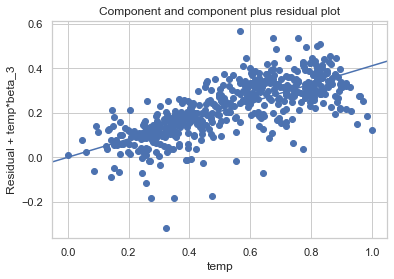

In [435]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model11, 'temp')
plt.show()

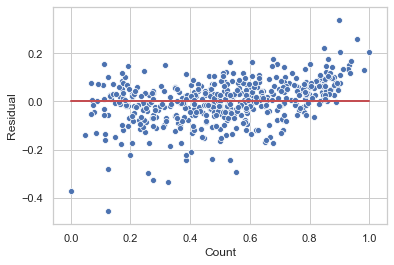

In [436]:
# Validating if the residuals have constant variance(Homoscedasticity)
y_train_pred = lr_model11.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

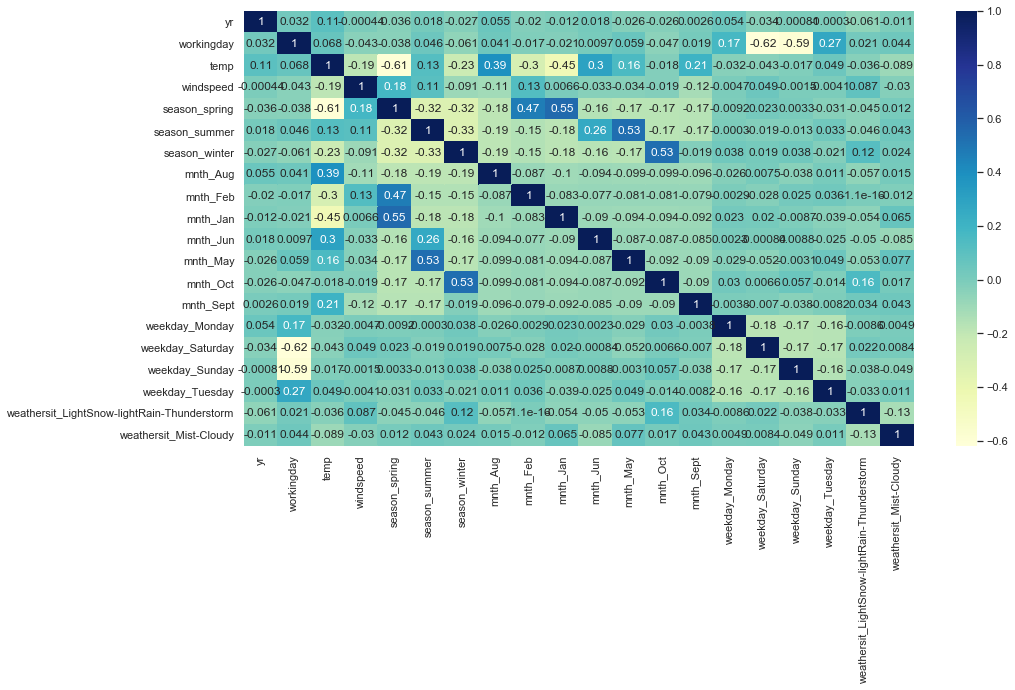

In [438]:
# Validating Multi-Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

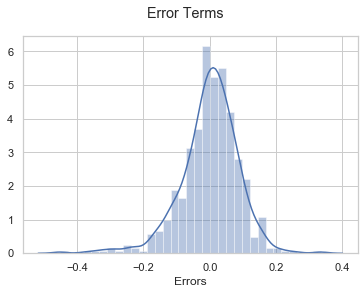

In [439]:
# Normality of Errors
y_train_pred = lr_model11.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

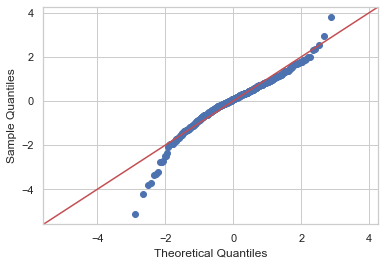

In [440]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()
# Error terms are normally distributed

In [441]:
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

In [442]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [443]:
# Adding the constant column
X_test_m11 = sm.add_constant(X_test)
# Removing all the columns which has been removed from Model 11
X_test_m11 = X_test_m11.drop(['mnth_Mar', 'mnth_Nov', 'mnth_Dec', 'weekday_Wednesday', 'weekday_Thursday', 'atemp', 'holiday', 
                             'mnth_Jul', 'hum'], axis=1)

In [444]:
y_test_pred = lr_model11.predict(X_test_m11)

In [445]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error
                                                                                           (y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score of the model for the predicted values is 0.81
The Root Mean Squared Error of the model for the predicted values is 0.0944
The Mean Absolute Error of the model for the predicted values is 0.06988799813938844


In [447]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8135464226493639